## Description
### Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help bank improve their services so that customers do not renounce their credit cards

Objective

Explore and visualize the dataset.
Build a classification model to predict if the customer is going to churn or not
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the bank
Data Dictionary:
* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

 

Importing Libraries

In [2]:
import warnings

warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier)
from xgboost import XGBClassifier

In [3]:
#creating DataFrame 
df = pd.read_csv("BankChurners.csv")

In [4]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- There are total 21 columns and 10,127 observations in the dataset
- From the above result we can see there are no null values for any columns in the dataset. We will verify this further by checking isna.

In [6]:
#checking unique values in the data set.
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

- ClientNum has a unique value for each customer and hence we can drop this colum.

In [7]:
# Dropping columns - CLIENTNUM
df.drop(columns=["CLIENTNUM"], inplace=True)

In [8]:
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

Getting 5 point summary of the data.

In [9]:
df.describe().T

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

- Customer Age has some skew with customers ranging in age from 26 to 73 years of age. About three fourth of the customers are aged 41 and above.
- Most customers have dependents.
- Most customers also have multiple accounts/relationship with the bank
- Credit Limit has a huge range. This is expected as bank will have few customers who have very limited credit approval and few high earners who will have high credit approvals.

### Data Preprocessing

In [10]:
# Making a list of all categorical variables
cat_col = [
    "Attrition_Flag",
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category"
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 40)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------------


- Attrition and Gender does not seems to have any incorrect values that need imputing.
- Education Level needs to imputed. College and Graduate can be assumed to mean the same. Hence, College can be replaced with Graduate. We will have to look further into "Unknown" category to determine how best to impute these records.
- Marital status too has a "Unknown" value, we will need to investigate further to determine how to best change this value.

In [11]:
# replacing College with Graduate
df["Education_Level"] = df["Education_Level"].replace("College", "Graduate")

In [12]:
df[df["Education_Level"] == "Unknown"]

Attrition_Flag  Customer_Age Gender  Dependent_count  \
6      Existing Customer            51      M                4   
11     Existing Customer            65      M                1   
15     Existing Customer            44      M                4   
17     Existing Customer            41      M                3   
23     Existing Customer            47      F                4   
...                  ...           ...    ...              ...   
10090  Existing Customer            36      F                3   
10094  Existing Customer            59      M                1   
10095  Existing Customer            46      M                3   
10118  Attrited Customer            50      M                1   
10123  Attrited Customer            41      M                2   

      Education_Level Marital_Status Income_Category Card_Category  \
6             Unknown        Married         $120K +          Gold   
11            Unknown        Married     $40K - $60K          Blue   
15            Unknown        Unknown    $80K - $120K          Blue   
17            Unknown        Married    $80K - $120K          Blue   
23            Unknown         Single  Less than $40K          Blue   
...               ...            ...             ...           ...   
10090         Unknown        Married     $40K - $60K          Blue   
10094         Unknown         Single     $60K - $80K          Blue   
10095         Unknown        Married    $80K - $120K          Blue   
10118         Unknown        Unknown    $80K - $120K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
6                  46                         6                       1   
11                 54                         6                       2   
15                 37                         5                       1   
17                 34                         4                       4   
23                 36                         3                       3   
...               ...                       ...                     ...   
10090              22                         5                       3   
10094              48                         3                       1   
10095              33                         4                       1   
10118              36                         6                       3   
10123              25                         4                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
6                          3       34516.0                 2264   
11                         3        9095.0                 1587   
15                         2        4234.0                  972   
17                         1       13535.0                 1291   
23                         2        2492.0                 1560   
...                      ...           ...                  ...   
10090                      3       12958.0                 2273   
10094                      2        7288.0                    0   
10095                      3       34516.0                 1099   
10118                      4        9959.0                  952   
10123                      3        4277.0                 2186   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6              32252.0                 1.975             1330              31   
11              7508.0                 1.433             1314              26   
15              3262.0                 1.707             1348              27   
17             12244.0                 0.653             1028              21   
23               932.0                 0.573             1126              23   
...                ...                   ...              ...             ...   
10090          10685.0                 0.608            15681              96   
10094           7288.0

- At this point we do not have any strong indicator of any relationship between Education Level and any other attribute in data set that can be used to determine the Education level. We will leave Unknown values as is and investigate further during Univariate and Bi Variate analysis.

In [13]:
df[df['Marital_Status']=='Unknown']

Attrition_Flag  Customer_Age Gender  Dependent_count  \
3      Existing Customer            40      F                4   
7      Existing Customer            32      M                0   
10     Existing Customer            42      M                5   
13     Existing Customer            35      M                3   
15     Existing Customer            44      M                4   
...                  ...           ...    ...              ...   
10070  Existing Customer            47      M                3   
10100  Existing Customer            39      M                2   
10101  Existing Customer            42      M                2   
10118  Attrited Customer            50      M                1   
10125  Attrited Customer            30      M                2   

      Education_Level Marital_Status Income_Category Card_Category  \
3         High School        Unknown  Less than $40K          Blue   
7         High School        Unknown     $60K - $80K        Silver   
10         Uneducated        Unknown         $120K +          Blue   
13           Graduate        Unknown     $60K - $80K          Blue   
15            Unknown        Unknown    $80K - $120K          Blue   
...               ...            ...             ...           ...   
10070     High School        Unknown    $80K - $120K        Silver   
10100        Graduate        Unknown     $60K - $80K        Silver   
10101        Graduate        Unknown     $40K - $60K          Blue   
10118         Unknown        Unknown    $80K - $120K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
3                  34                         3                       4   
7                  27                         2                       2   
10                 31                         5                       3   
13                 30                         5                       1   
15                 37                         5                       1   
...               ...                       ...                     ...   
10070              40                         5                       3   
10100              36                         4                       2   
10101              30                         3                       2   
10118              36                         6                       3   
10125              36                         4                       3   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
3                          1        3313.0                 2517   
7                          2       29081.0                 1396   
10                         2        6748.0                 1467   
13                         3        8547.0                 1666   
15                         2        4234.0                  972   
...                      ...           ...                  ...   
10070                      2       34516.0                 1371   
10100                      2       29808.0                    0   
10101                      5        3735.0                 1723   
10118                      4        9959.0                  952   
10125                      3        5281.0                    0   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
3                796.0                 1.405             1171              20   
7              27685.0                 2.204             1538              36   
10              5281.0                 0.831             1201              42   
13              6881.0                 1.163             1311              33   
15              3262.0                 1.707             1348              27   
...                ...                   ...              ...             ...   
10070          33145.0                 0.691            15930             123   
10100          29808.0

- An assumption can be made that if a person has 0 dependents they are most likely single. Using this assumption imputing values.

In [14]:
df[df['Dependent_count']==0]

Attrition_Flag  Customer_Age Gender  Dependent_count  \
7      Existing Customer            32      M                0   
21     Attrited Customer            62      F                0   
34     Existing Customer            58      M                0   
39     Attrited Customer            66      F                0   
52     Existing Customer            66      F                0   
...                  ...           ...    ...              ...   
10097  Existing Customer            31      M                0   
10106  Existing Customer            58      F                0   
10107  Attrited Customer            61      M                0   
10113  Attrited Customer            27      M                0   
10114  Existing Customer            29      M                0   

      Education_Level Marital_Status Income_Category Card_Category  \
7         High School        Unknown     $60K - $80K        Silver   
21           Graduate        Married  Less than $40K          Blue   
34           Graduate        Married    $80K - $120K          Blue   
39          Doctorate        Married         Unknown          Blue   
52        High School        Married  Less than $40K          Blue   
...               ...            ...             ...           ...   
10097     High School         Single     $40K - $60K          Blue   
10106        Graduate         Single  Less than $40K          Blue   
10107        Graduate         Single     $60K - $80K          Blue   
10113     High School       Divorced     $60K - $80K          Blue   
10114        Graduate        Married  Less than $40K          Blue   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
7                  27                         2                       2   
21                 49                         2                       3   
34                 49                         6                       2   
39                 56                         5                       4   
52                 54                         3                       4   
...               ...                       ...                     ...   
10097              25                         3                       2   
10106              48                         2                       2   
10107              54                         2                       1   
10113              36                         2                       3   
10114              15                         3                       1   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
7                          2       29081.0                 1396   
21                         3        1438.3                    0   
34                         2       12555.0                 1696   
39                         3        7882.0                  605   
52                         2        3171.0                 2179   
...                      ...           ...                  ...   
10097                      3        4493.0                 1388   
10106                      5        4299.0                 1334   
10107                      4       11859.0                 1644   
10113                      2       13303.0                 2517   
10114                      5        4700.0                    0   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
7              27685.0                 2.204             1538              36   
21              1438.3                 1.047              692              16   
34             10859.0                 0.519             1291              24   
39              7277.0                 1.052              704              16   
52               992.0                 1.224             1946              38   
...                ...                   ...              ...             ...   
10097           3105.0                 0.795            17744             104   
10106           2965.0

In [15]:
groupdata = df.groupby(by=['Dependent_count'])['Marital_Status']
groupdata.describe()

count unique      top  freq
Dependent_count                            
0                 904      4   Single   399
1                1838      4  Married   832
2                2655      4  Married  1284
3                2732      4  Married  1251
4                1574      4  Married   727
5                 424      4  Married   206

In [16]:
# above data also suggest that Single is the most common value when dependent count is 0. 
# Updating the values for Marital status
df.loc[df.Dependent_count==0, 'Marital_Status'] = "Single"

In [17]:
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [18]:
df[df['Marital_Status']=='Unknown']

Attrition_Flag  Customer_Age Gender  Dependent_count  \
3      Existing Customer            40      F                4   
10     Existing Customer            42      M                5   
13     Existing Customer            35      M                3   
15     Existing Customer            44      M                4   
26     Existing Customer            59      M                1   
...                  ...           ...    ...              ...   
10070  Existing Customer            47      M                3   
10100  Existing Customer            39      M                2   
10101  Existing Customer            42      M                2   
10118  Attrited Customer            50      M                1   
10125  Attrited Customer            30      M                2   

      Education_Level Marital_Status Income_Category Card_Category  \
3         High School        Unknown  Less than $40K          Blue   
10         Uneducated        Unknown         $120K +          Blue   
13           Graduate        Unknown     $60K - $80K          Blue   
15            Unknown        Unknown    $80K - $120K          Blue   
26        High School        Unknown     $40K - $60K          Blue   
...               ...            ...             ...           ...   
10070     High School        Unknown    $80K - $120K        Silver   
10100        Graduate        Unknown     $60K - $80K        Silver   
10101        Graduate        Unknown     $40K - $60K          Blue   
10118         Unknown        Unknown    $80K - $120K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
3                  34                         3                       4   
10                 31                         5                       3   
13                 30                         5                       1   
15                 37                         5                       1   
26                 46                         4                       1   
...               ...                       ...                     ...   
10070              40                         5                       3   
10100              36                         4                       2   
10101              30                         3                       2   
10118              36                         6                       3   
10125              36                         4                       3   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
3                          1        3313.0                 2517   
10                         2        6748.0                 1467   
13                         3        8547.0                 1666   
15                         2        4234.0                  972   
26                         2       14784.0                 1374   
...                      ...           ...                  ...   
10070                      2       34516.0                 1371   
10100                      2       29808.0                    0   
10101                      5        3735.0                 1723   
10118                      4        9959.0                  952   
10125                      3        5281.0                    0   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
3                796.0                 1.405             1171              20   
10              5281.0                 0.831             1201              42   
13              6881.0                 1.163             1311              33   
15              3262.0                 1.707             1348              27   
26             13410.0                 0.921             1197              23   
...                ...                   ...              ...             ...   
10070          33145.0                 0.691            15930             123   
10100          29808.0

In [19]:
# replacing the remaining values with Marrried as it is the most common for remaining records.
df["Marital_Status"] = df["Marital_Status"].replace("Unknown", "Married")

In [20]:
# checking if there are any pending records.
df[df['Marital_Status']=='Unknown']

Empty DataFrame
Columns: [Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

In [21]:
# we will replace the Unknown values with null for income category and later use KNN imputer to impute the null values.
df["Income_Category"] = df["Income_Category"].replace("Unknown", np.nan)

In [22]:
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Married  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [23]:
df.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level                0
Marital_Status                 0
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

### EDA

In [24]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

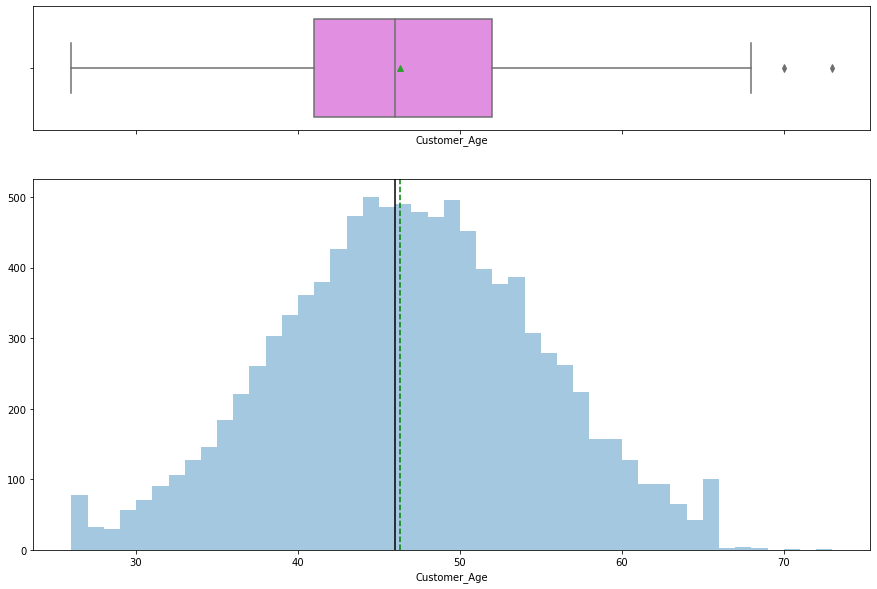

In [25]:
# Observations on Customer_age
histogram_boxplot(df["Customer_Age"])

- Age seems to have a fairly normal distribution.
- There are a couple of outliers, however the values don't see to be too far off from the normal. We will not impute age at this moment.

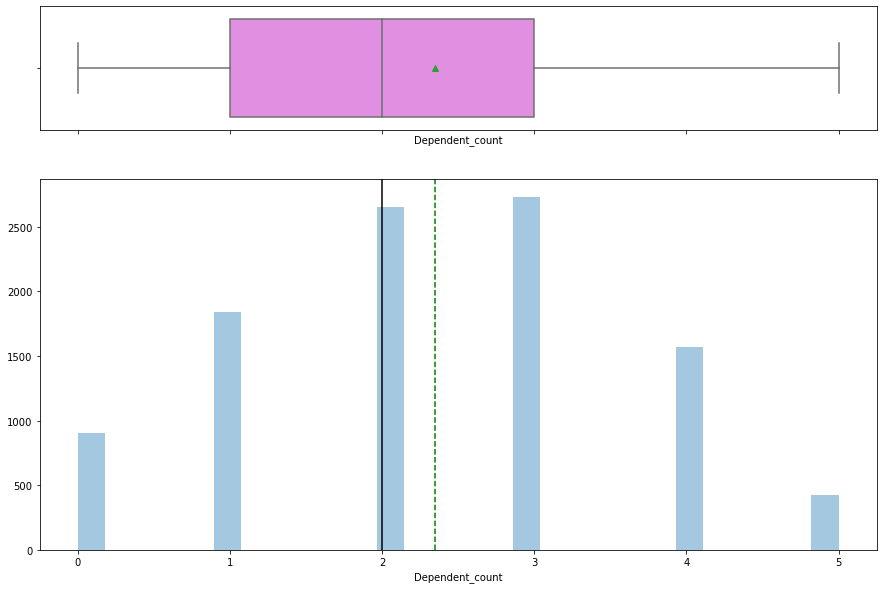

In [26]:
# Observations on Dependent_count
histogram_boxplot(df["Dependent_count"])

- There aren't any outliers for dependents. 
- From the distribution we can see most of the customers have 1 or more dependent.

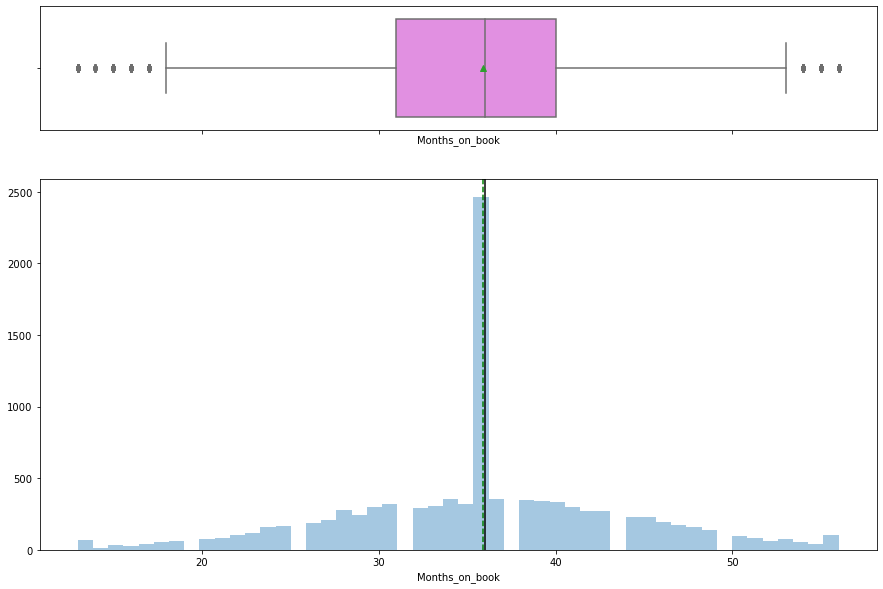

In [27]:
# Observations on Months_on_book
histogram_boxplot(df["Months_on_book"])

- There are a few outliers but they do seem to be within the normal expected limits so we will not treat them.
- There seems to be a huge spike is number of customers that have been with the bank for about 36-37 months. This seems un-usual. This could mean one of the two things. Either the Months of books are calculated as the average time of all the relationshipt account the cusomer has or the data selected seems to have included more records for customers with average relationship age as 36-37 months
- This can be discussed with the Business team to determine why there is such a huge jump. For our case we may want to use a scaler function to normalize the data.


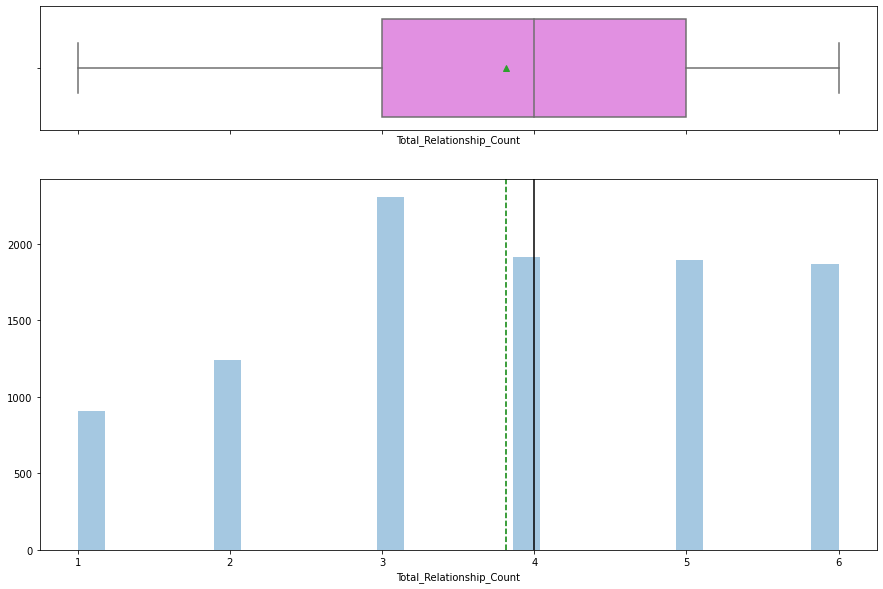

In [28]:
# Observations on Total_Relationship_Count
histogram_boxplot(df["Total_Relationship_Count"])

- Seems evenly distributed. Nothing out of the normal.

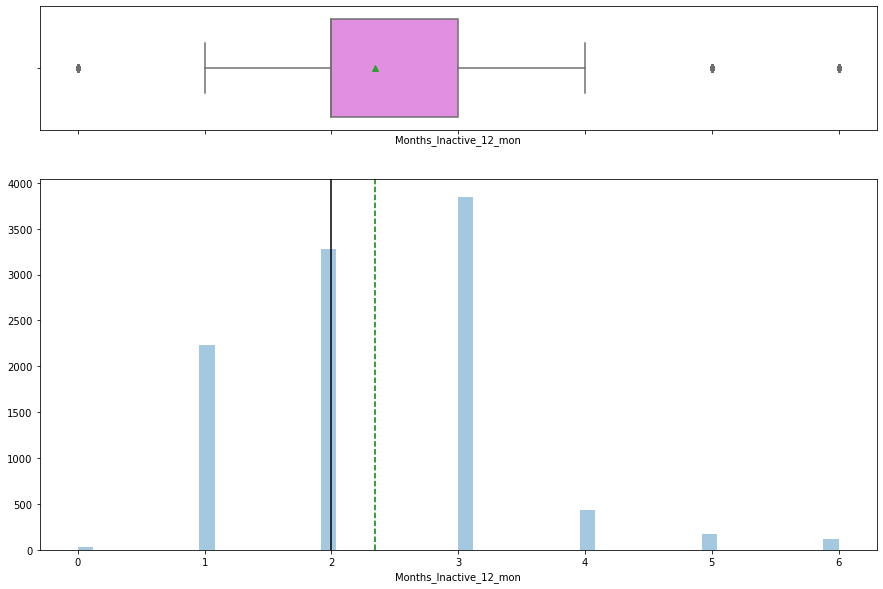

In [29]:
# Observations on Months_Inactive_12_mon
histogram_boxplot(df["Months_Inactive_12_mon"])

- Seems like lot of customers do remain in active atleast for 2-3 months during the 12 month period.

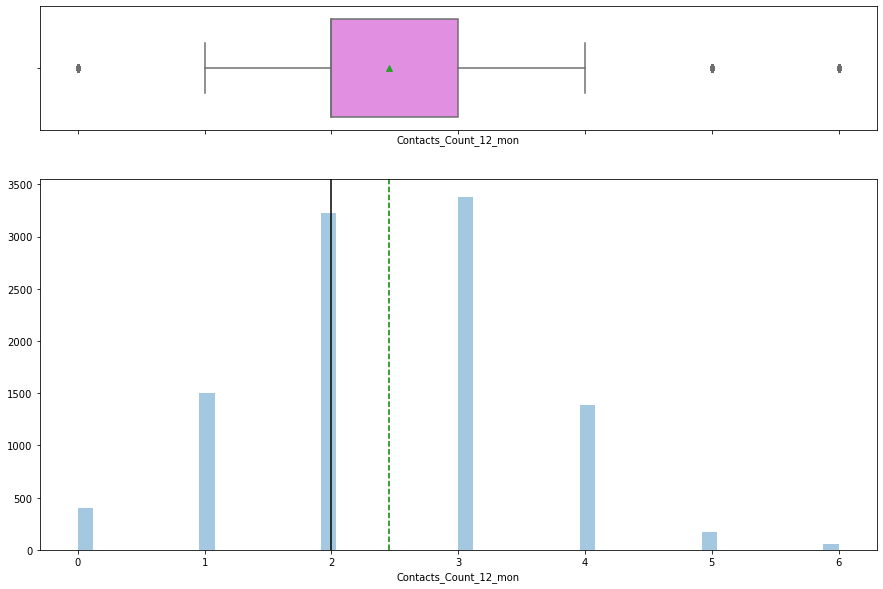

In [30]:
# Observations on Contacts_Count_12_mon
histogram_boxplot(df["Contacts_Count_12_mon"])

- Seems like a even distribution
- Most customers contact bank at least 2-3 times. There are few outliers but they seem like normal expected customer behavior where few customer are more likely to contact bank vs few very rarely contact bank.

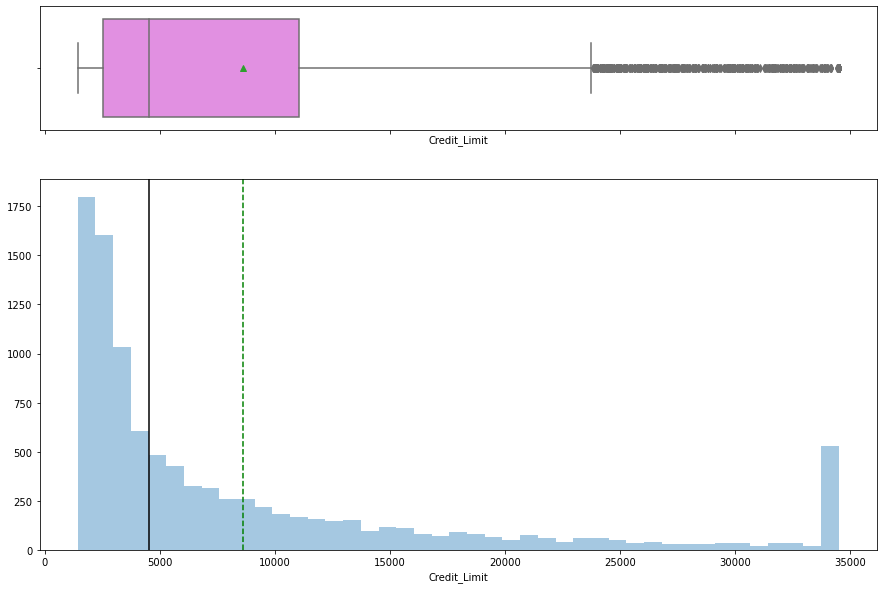

In [31]:
# Observations on Credit_Limit
histogram_boxplot(df["Credit_Limit"])

- Credit limit data seems to be right skewed.

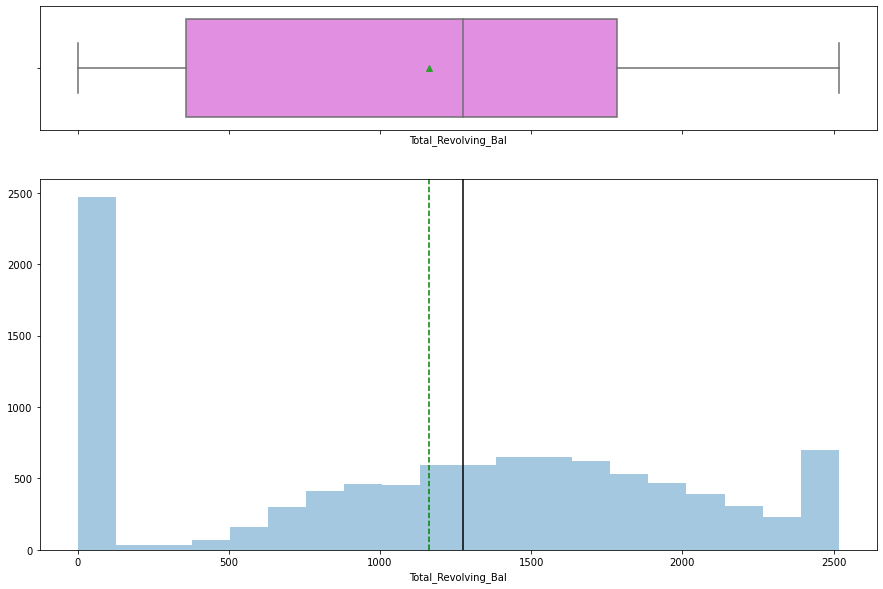

In [32]:
# Observations on Total_Revolving_Bal
histogram_boxplot(df["Total_Revolving_Bal"])

- Most customers fall in the normal expected range. There are a few customers that do not use or have balance on their credit card.

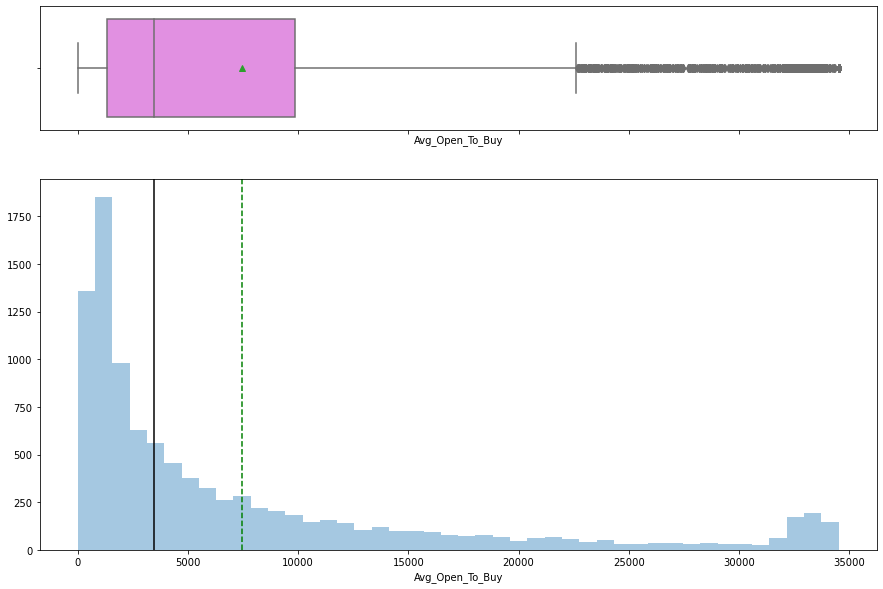

In [33]:
# Observations on Avg_Open_To_Buy
histogram_boxplot(df["Avg_Open_To_Buy"])

- Data is right skewed.

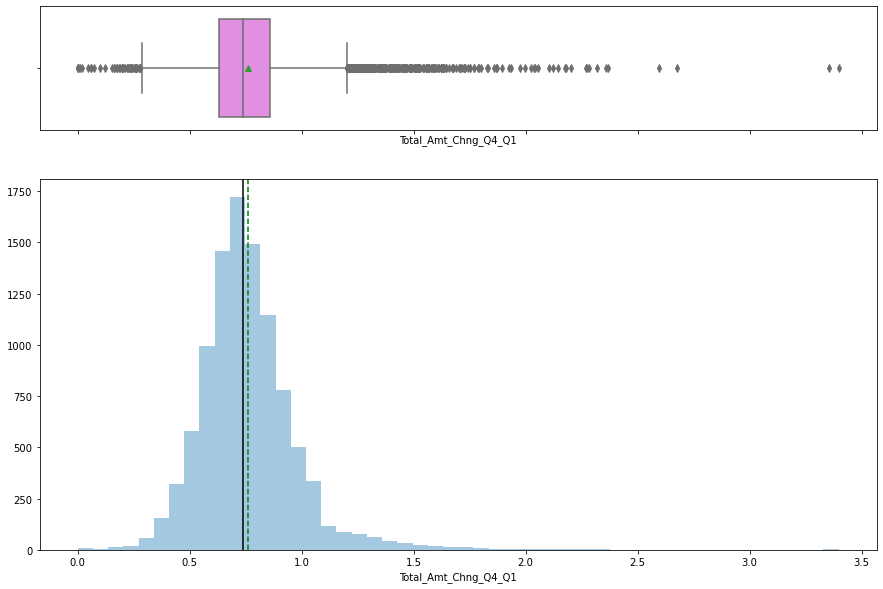

In [34]:
# Observations on Total_Amt_Chng_Q4_Q1
histogram_boxplot(df["Total_Amt_Chng_Q4_Q1"])

- There are a few extreme outliers. We will clip the upper limit to 2.5 to stay close to the rest of distribution.

In [35]:
# Capping values for Total_Amt_Chng_Q4_Q1 at 2.5
df["Total_Amt_Chng_Q4_Q1"].clip(upper=2.5, inplace=True)

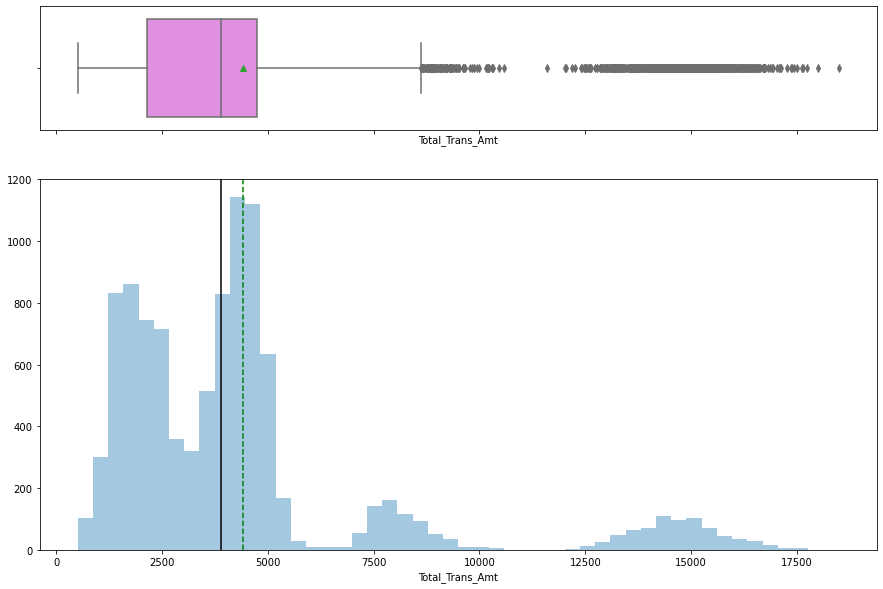

In [36]:
# Observations on Total_Trans_Amt
histogram_boxplot(df["Total_Trans_Amt"])

- Data seems to very un evenly distributed. 
- But this could be expected customer behavior as customers with higher income and credit approval will have higher spending.

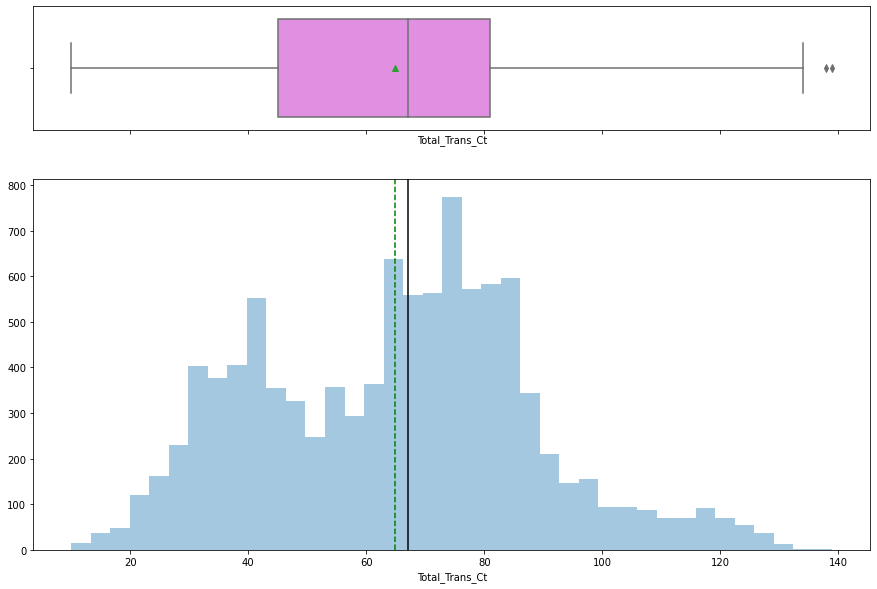

In [37]:
# Observations on Total_Trans_Ct
histogram_boxplot(df["Total_Trans_Ct"])

- There are a couple of outliers but are not too far from normal distribution. We will leave them as is.

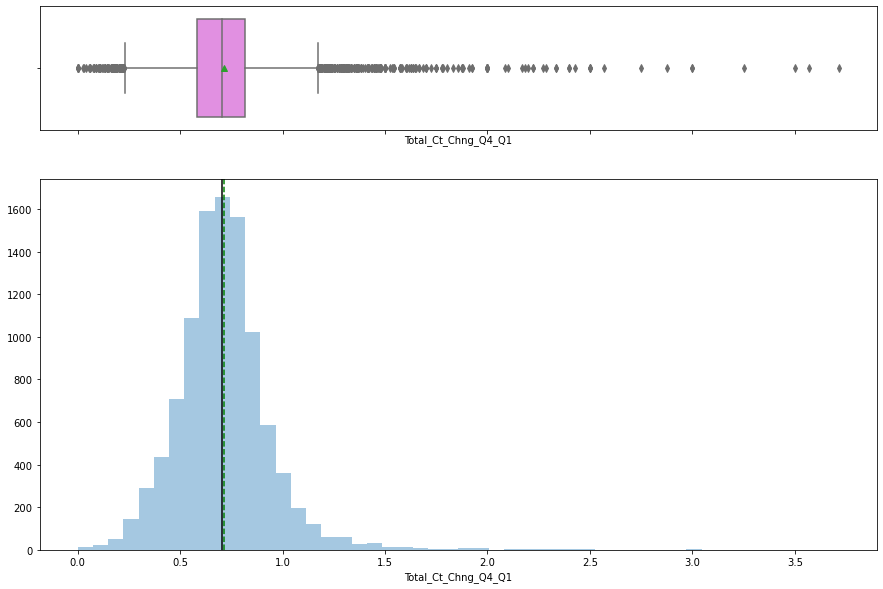

In [38]:
# Observations on Total_Ct_Chng_Q4_Q1
histogram_boxplot(df["Total_Ct_Chng_Q4_Q1"])

- The distribution is some what even, however there are quite a few outlier. These could also be indicative of actual customer beharvior. So leaving them as is.

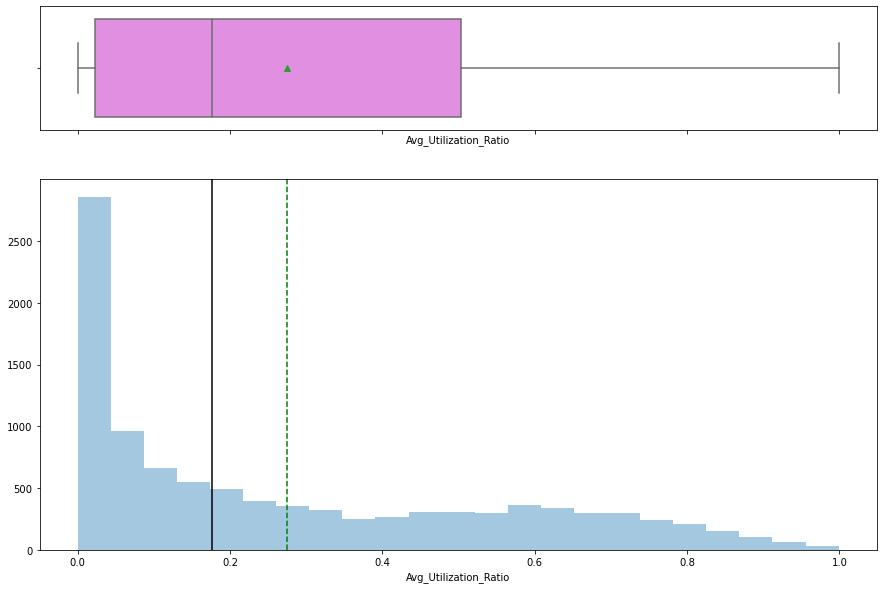

In [39]:
# Observations on Avg_Utilization_Ratio
histogram_boxplot(df["Avg_Utilization_Ratio"])

- There is some right skewness in the data.
- Most customers spend less than 20% of the approved limit.

In [40]:
def perc_on_bar(feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    # Creating a countplot for the feature
    sns.set(rc={"figure.figsize": (10, 5)})
    ax = sns.countplot(x=feature, data=df)

    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=14)  # annotate the percantage

    plt.show()  # show the plot

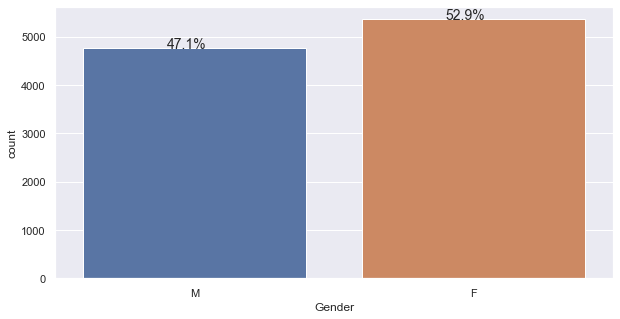

In [41]:
# observations on Gender
perc_on_bar(df["Gender"])

- Data does show a good balance of M and F. Although observations for Female customer is slightly more than males. This is fine.

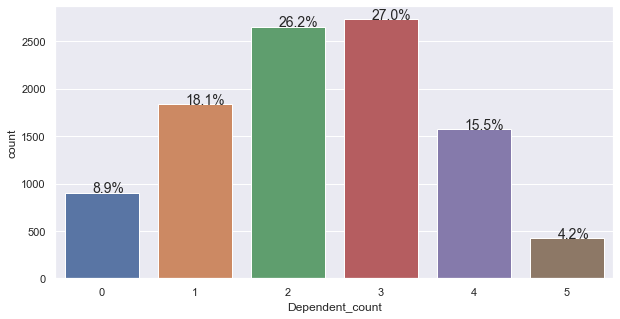

In [42]:
# observations on Dependent_count
perc_on_bar(df["Dependent_count"])

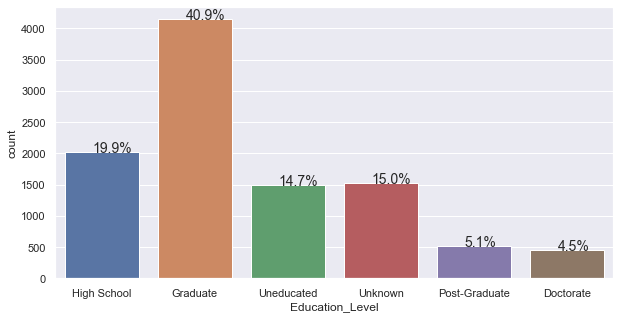

In [43]:
# observations on Education_Level
perc_on_bar(df["Education_Level"])

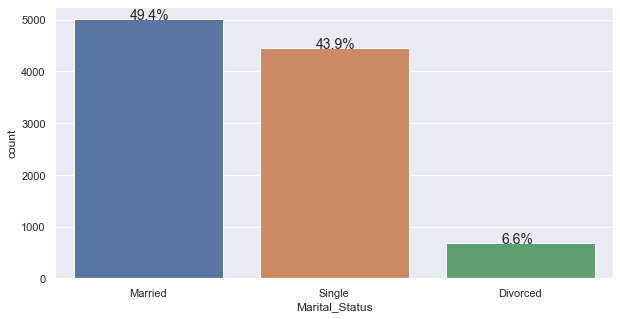

In [44]:
# observations on Marital_Status
perc_on_bar(df["Marital_Status"])

- Percentage of customer who are either married or single is more, with very few observations on Divorced.

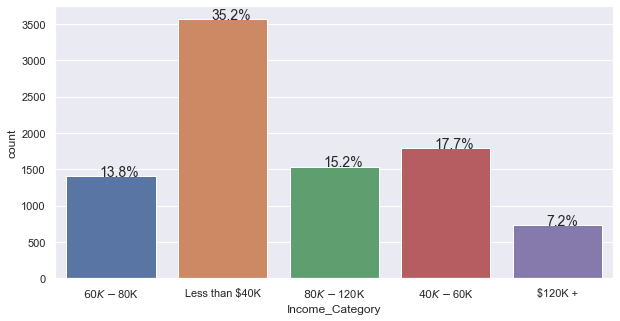

In [45]:
# observations on Income_Category
perc_on_bar(df["Income_Category"])

- A significant percentage of customers earn less than 40k

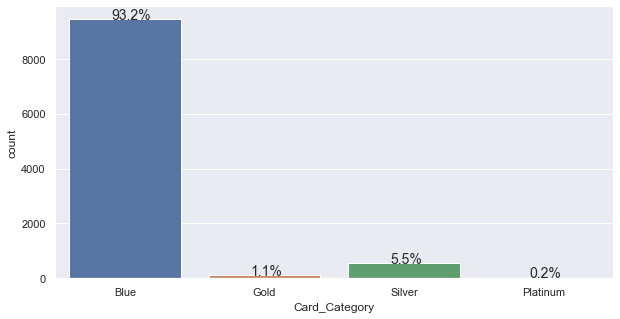

In [46]:
# observations on Card_Category
perc_on_bar(df["Card_Category"])

- Most observations are for customers that have Blue Card type. 
- Very few customers opt for other card types.

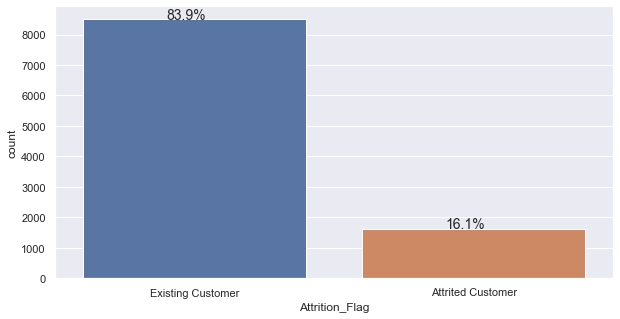

In [47]:
# observations on Attrition_Flag
perc_on_bar(df["Attrition_Flag"])

- Above plot shows about 15% of customers have attrited. 

### Bi Variate Analysis

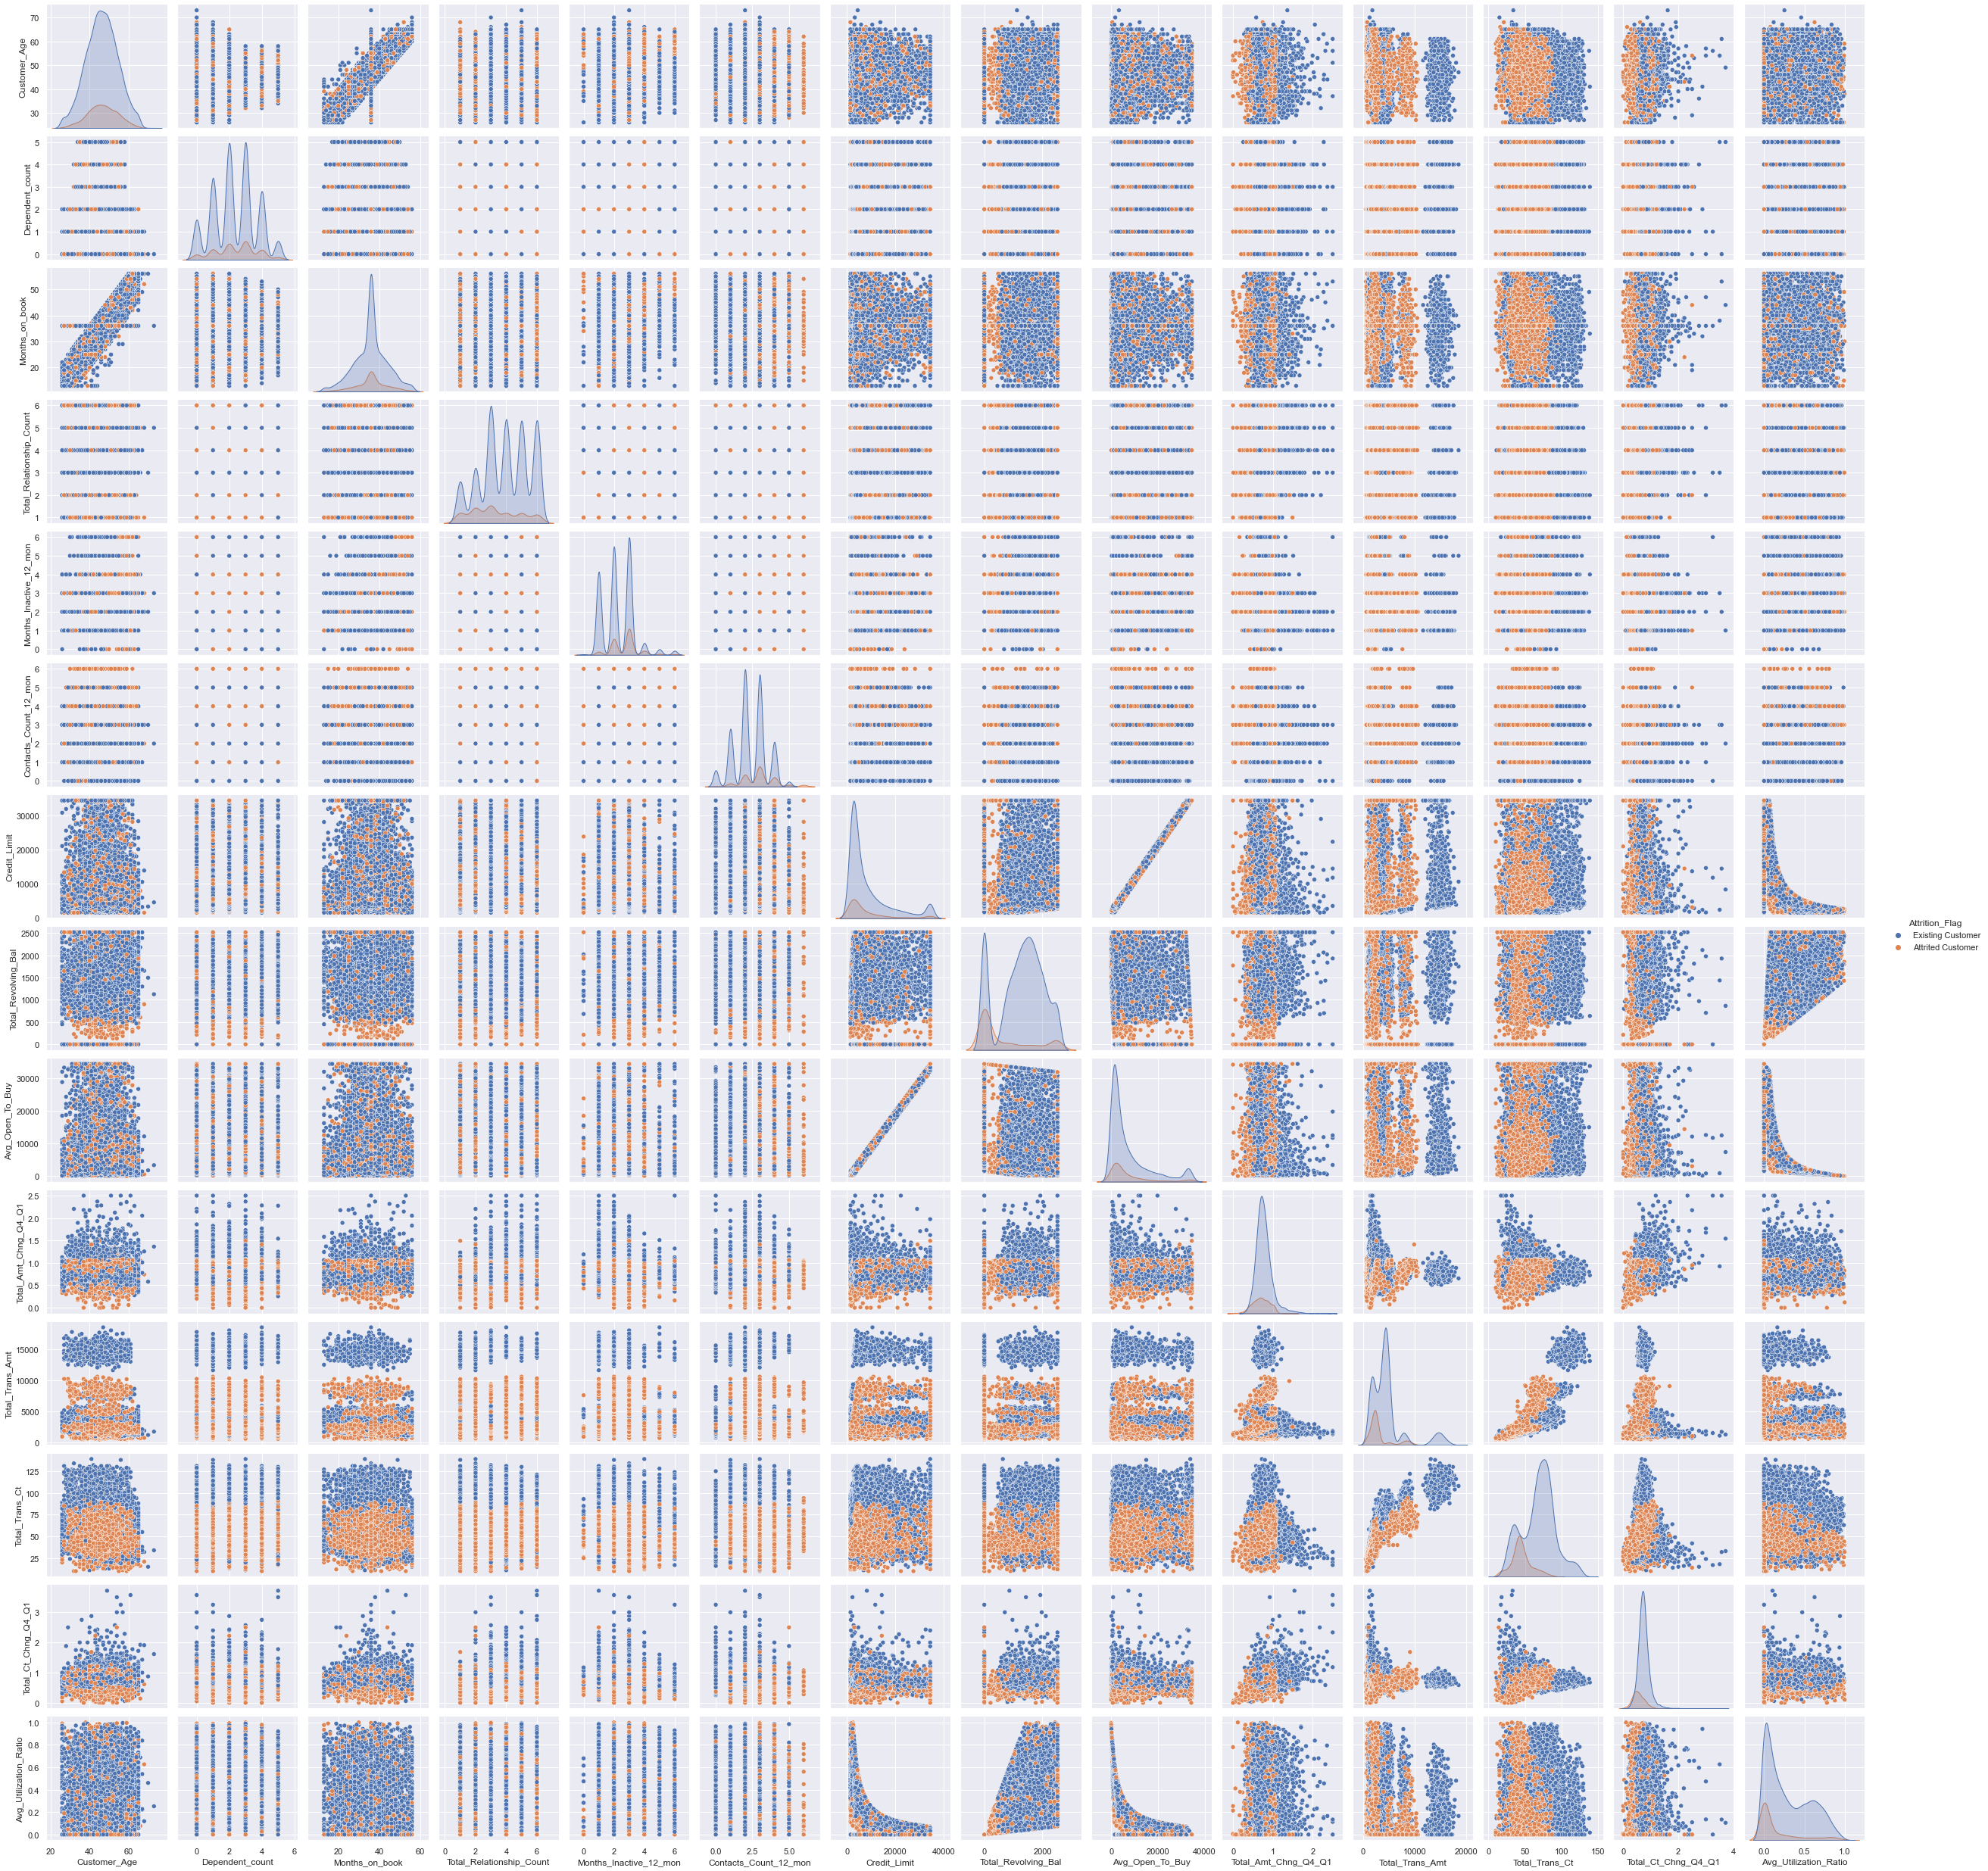

In [48]:
sns.pairplot(df, hue="Attrition_Flag")

- Exploring further using other plots.

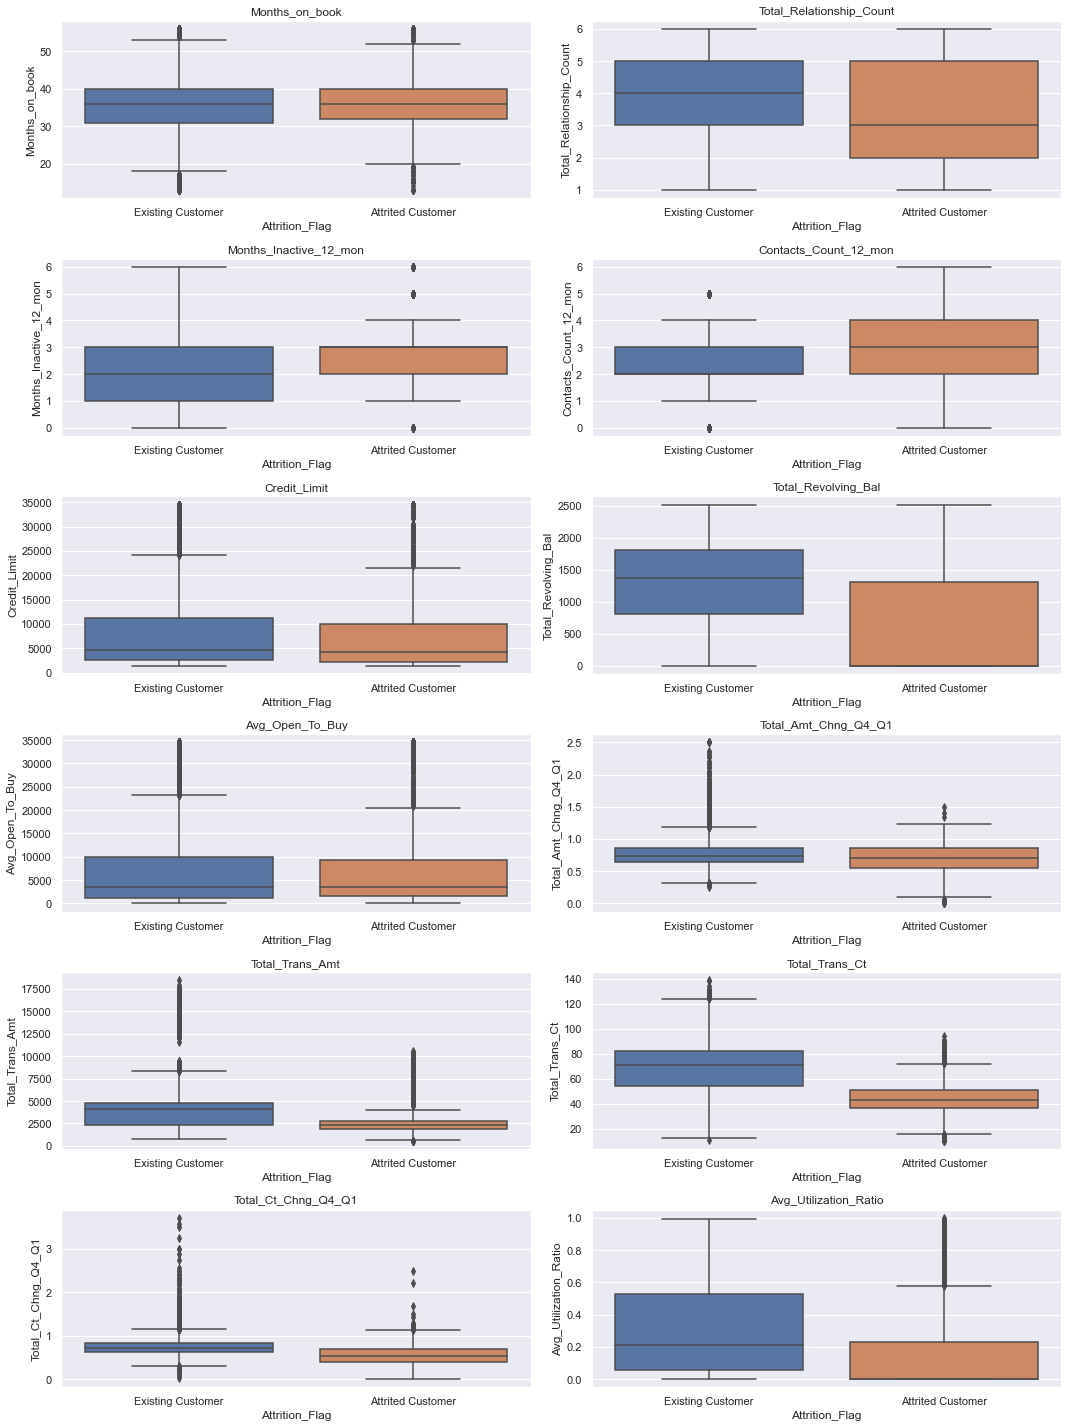

In [49]:
cols = df[
    [
        "Months_on_book",
        "Total_Relationship_Count",
        "Months_Inactive_12_mon",
        "Contacts_Count_12_mon",
        "Credit_Limit",
        "Total_Revolving_Bal",
        "Avg_Open_To_Buy",
        "Total_Amt_Chng_Q4_Q1",
        "Total_Trans_Amt",
        "Total_Trans_Ct",      
        "Total_Ct_Chng_Q4_Q1",
        "Avg_Utilization_Ratio",
    ]
].columns.tolist()
plt.figure(figsize=(15, 20))

for i, variable in enumerate(cols):
    plt.subplot(6, 2, i + 1)
    sns.boxplot(df["Attrition_Flag"], df[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

- Customers having fewer Relationship count are more likely to Attrite
- Customers with less revolving balance do attrite more


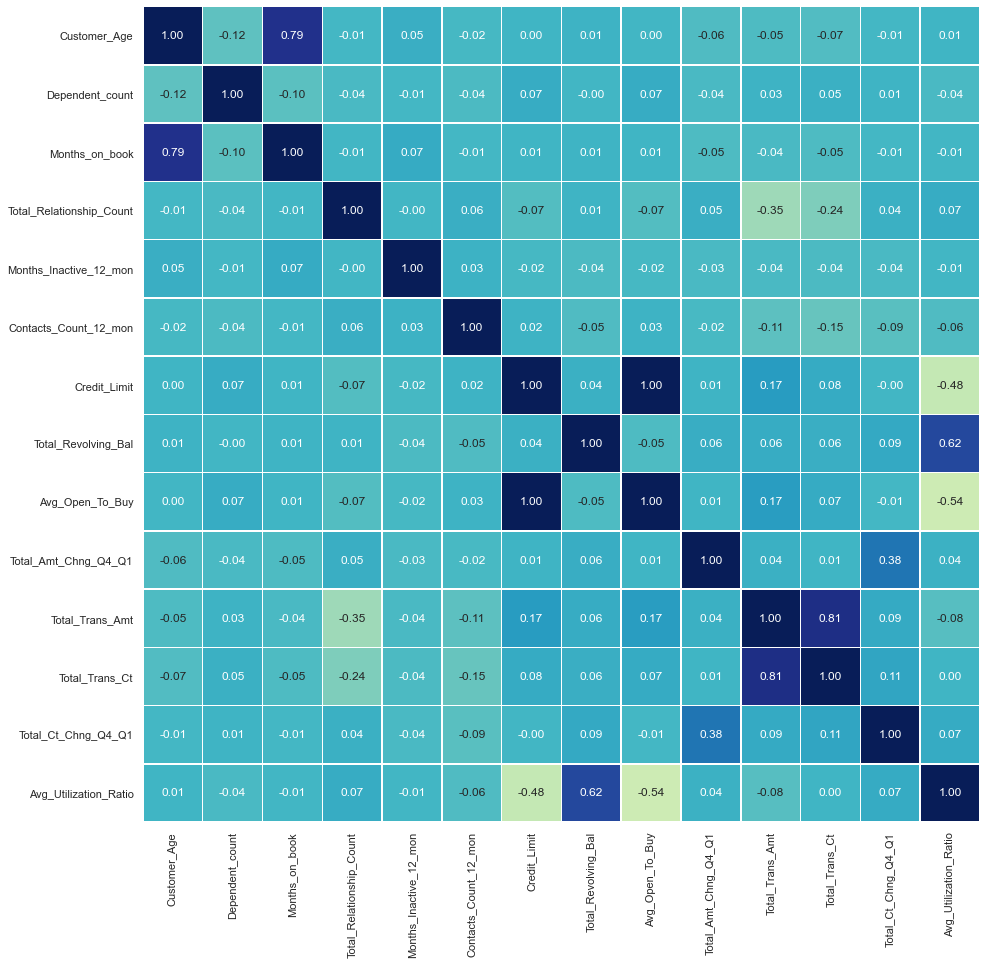

In [50]:
sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    df.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

- Months on book and Customer Age have strong co-relation. Age can be dropped.
- Credit Limit and Avg Open to Buy have a very strong co-relation. Avg Open to buy can be dropped.
- Total_Trans_ct and Total Trans Amt have very strong co-relation. Total Trans Ct can be dropped
- Similar Avg Utilization Ration can be dropped due to co-relation.

In [51]:
# Dropping columns
df.drop(
    columns=[
        "Customer_Age",
        "Avg_Open_To_Buy",
        "Total_Trans_Ct",
        "Avg_Utilization_Ratio",
    ],
    inplace=True,
)

In [52]:
# Making a list of all categorical variables
cat_col = [
    "Attrition_Flag",
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category"
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 40)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Graduate         4141
High School      2013
Unknown          1519
Uneducated       1487
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     5006
Single      4448
Divorced     673
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------------


### Data Preparation

In [53]:
df.head()

Attrition_Flag Gender  Dependent_count Education_Level Marital_Status  \
0  Existing Customer      M                3     High School        Married   
1  Existing Customer      F                5        Graduate         Single   
2  Existing Customer      M                3        Graduate        Married   
3  Existing Customer      F                4     High School        Married   
4  Existing Customer      M                3      Uneducated        Married   

  Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0     $60K - $80K          Blue              39                         5   
1  Less than $40K          Blue              44                         6   
2    $80K - $120K          Blue              36                         4   
3  Less than $40K          Blue              34                         3   
4     $60K - $80K          Blue              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
0                  777                 1.335             1144   
1                  864                 1.541             1291   
2                    0                 2.500             1887   
3                 2517                 1.405             1171   
4                    0                 2.175              816   

   Total_Ct_Chng_Q4_Q1  
0                1.625  
1                3.714  
2                2.333  
3                2.333  
4                2.500

In [54]:
Attrition_Flag = {'Existing Customer':0, 'Attrited Customer':1}
df['Attrition_Flag']=df['Attrition_Flag'].map(Attrition_Flag)
Gender = {'F':1,'M':2}
df['Gender']=df['Gender'].map(Gender)
Marital_Status = {'Married':1,'Single':2,'Divorced':3}
df['Marital_Status']=df['Marital_Status'].map(Marital_Status)
Income_Category = {'Less than $40K':1,'$40K - $60K':2,'$60K - $80K':3,'$80K - $120K':4,'$120K +':5}
df['Income_Category']=df['Income_Category'].map(Income_Category)
Card_Category = {'Blue':1,'Silver':2,'Gold':3,'Platinum':4}
df['Card_Category']=df['Card_Category'].map(Card_Category)
Education_Level = {'Graduate':1,'High School':2,'Uneducated':3,'Post-Graduate':4,'Doctorate':5,'Unknown':np.nan}
df['Education_Level']=df['Education_Level'].map(Education_Level)

setting Unknown education level to null. We will then use KNN imputer to find the best value to impute

In [55]:
df.isna().sum()

Attrition_Flag                 0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status                 0
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Ct_Chng_Q4_Q1            0
dtype: int64

#### Splitting data into train and test

In [56]:
# Separating target variable and other variables
X = df.drop(columns="Attrition_Flag")
Y = df["Attrition_Flag"]

In [57]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 15) (3039, 15)


#### Missing value treatment

In [58]:
imputer = KNNImputer(n_neighbors=5)

In [59]:
#Fit and transform the train data
X_train=pd.DataFrame(imputer.fit_transform(X_train),columns=X_train.columns)

#Transform the test data 
X_test=pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)

In [60]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Ct_Chng_Q4_Q1         0
dtype: int64
------------------------------
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Ct_Chng_Q4_Q1         0
dtype: int64


In [61]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

In [62]:
inverse_mapping(Gender,'Gender')
inverse_mapping(Marital_Status,'Marital_Status')
inverse_mapping(Income_Category,'Income_Category')
inverse_mapping(Card_Category,'Card_Category')
inverse_mapping(Education_Level,'Education_Level')

In [63]:
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3770
M    3318
Name: Gender, dtype: int64
******************************
Graduate         3074
High School      2139
Uneducated       1194
Post-Graduate     369
Doctorate         312
Name: Education_Level, dtype: int64
******************************
Married     3508
Single      3121
Divorced     459
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2638
$40K - $60K       1510
$80K - $120K      1225
$60K - $80K       1200
$120K +            515
Name: Income_Category, dtype: int64
******************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
******************************


In [64]:
cols = X_test.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_test[i].value_counts())
    print('*'*30)

F    1588
M    1451
Name: Gender, dtype: int64
******************************
Graduate         1339
High School       877
Uneducated        529
Post-Graduate     155
Doctorate         139
Name: Education_Level, dtype: int64
******************************
Married     1498
Single      1327
Divorced     214
Name: Marital_Status, dtype: int64
******************************
Less than $40K    1124
$40K - $60K        670
$80K - $120K       507
$60K - $80K        507
$120K +            231
Name: Income_Category, dtype: int64
******************************
Blue        2815
Silver       180
Gold          38
Platinum       6
Name: Card_Category, dtype: int64
******************************


#### Encoding Categorical Variables

In [65]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 24) (3039, 24)


### Model Building

#### Metric of Choice
- In this particular case it is very important for bank to have a model that can very accurately predict the possiblity of a customer to Attrite as that would mean loss of business. Keeping that in mind we will concentrate on improving the RECALL score of the model.

In [66]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    train_f1 = metrics.f1_score(train_y,pred_train)
    test_f1 = metrics.f1_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
        print("F1 on training set : ",metrics.f1_score(train_y,pred_train))
        print("F1 on test set : ",metrics.f1_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [67]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (4,3))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Logistic Regression

In [68]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

#### Using KFold and Cross validation

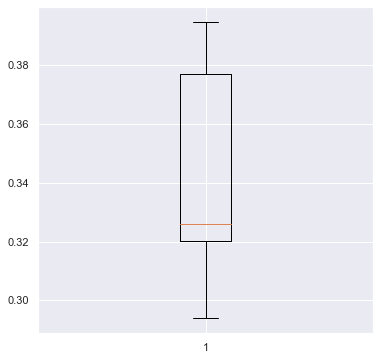

In [69]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(6, 6))
plt.boxplot(cv_result_bfr)
plt.show()

Model's recall score is in the range of 0.30 to 0.39

Accuracy on training set :  0.8797968397291196
Accuracy on test set :  0.8719973675551168
Recall on training set :  0.36611062335381916
Recall on test set :  0.3319672131147541
Precision on training set :  0.7623400365630713
Precision on test set :  0.72
F1 on training set :  0.49466192170818507
F1 on test set :  0.45441795231416543


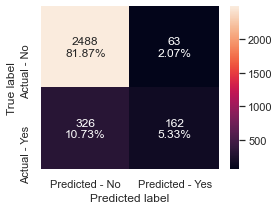

In [71]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

- While the model did generalize well on the data set. We see Recall is pretty low.
- We will try to use some Up/Down sampling to see if that helps with model performance.

#### UnderSampling train data

In [72]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [73]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1139
Before Under Sampling, counts of label 'No': 5949 

After Under Sampling, counts of label 'Yes': 1139
After Under Sampling, counts of label 'No': 1139 

After Under Sampling, the shape of train_X: (2278, 24)
After Under Sampling, the shape of train_y: (2278,) 



#### Logistic Regression on Undersampled data

In [74]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=1)

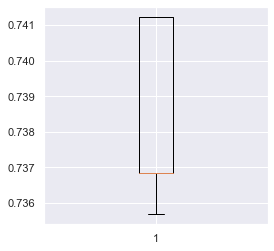

In [75]:
##KFold Cross validation
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(4, 4))
plt.boxplot(cv_result_under)
plt.show()

Recall does improve on train set and ranges between 0.73 to 0.741

Accuracy on training set :  0.7423178226514486
Accuracy on test set :  0.7581441263573544
Recall on training set :  0.7436347673397717
Recall on test set :  0.7090163934426229
Precision on training set :  0.7416812609457093
Precision on test set :  0.36847710330138445
F1 on training set :  0.7426567295046032
F1 on test set :  0.48493342676944645


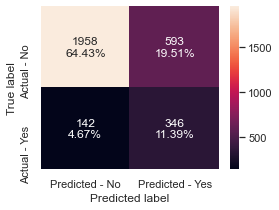

In [76]:
#checking performance on test set.
get_metrics_score(log_reg_under,X_train_un,X_test,y_train_un,y_test)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

Models performance seemed to have improved. We see Recall on Test set is 0.70.
Also, there doesn't seem to be any overfit as the difference between test and train performance is not far off.

#### Oversampling using SMOTE

In [77]:
from imblearn.over_sampling import SMOTE

In [78]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1139
Before UpSampling, counts of label 'No': 5949 

After UpSampling, counts of label 'Yes': 5949
After UpSampling, counts of label 'No': 5949 

After UpSampling, the shape of train_X: (11898, 24)
After UpSampling, the shape of train_y: (11898,) 



#### Logistic Regression on Oversampled Data

In [79]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

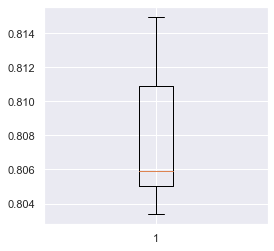

In [80]:
# using kfold cross validation
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(4, 4))
plt.boxplot(cv_result_over)
plt.show()

- Oversampling has seemed to boost up the performance on train set. Recall ranges between 0.80 to 0.815

Accuracy on training set :  0.7973609009917633
Accuracy on test set :  0.7815070746956235
Recall on training set :  0.7920658934274668
Recall on test set :  0.639344262295082
Precision on training set :  0.800543662928984
Precision on test set :  0.39
F1 on training set :  0.796282213772708
F1 on test set :  0.48447204968944096


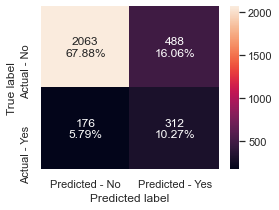

In [81]:
#Calculating different metrics
get_metrics_score(log_reg_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

- While the performance improved in Train data set. Same cannot be said about the performance on test data. There seems to be some overfitting.
- Trying Regularization to see if overfitting can be reduced.

#### Regularization

In [82]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.7029752899646999
Accuracy on test set :  0.7857847976307996
Recall on training set :  0.5629517565977475
Recall on test set :  0.5081967213114754
Precision on training set :  0.7819285547513425
Precision on test set :  0.37632776934749623
F1 on training set :  0.6546129788897577
F1 on test set :  0.43243243243243246


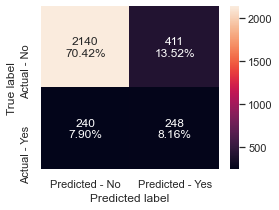

In [83]:
#Calculating different metrics
get_metrics_score(lr_estimator,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

- While the overfitting problem is solved. The models performance is dropped to 50% for Test data. 


In [84]:
# training models by creating pipeline

from sklearn.ensemble import BaggingClassifier

models = []  

models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "Bagging",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("bagging", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 42.58250251178607
RF: 67.33827961975423
GBM: 74.97449571064224
ADB: 72.16941030991576
XGB: 81.29608161372595
Bagging: 74.80214854316408
DTREE: 73.66257052322436


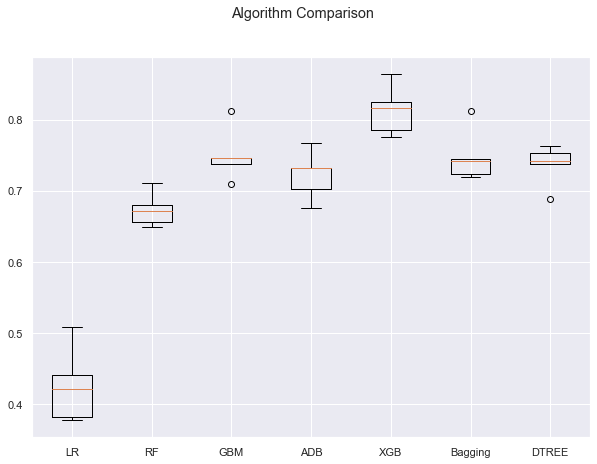

In [85]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- From above data we can see that XGBoost algoright performs well followed by Bagging and DTree

#### Performing Hyperparamet tuning using GridSearch

##### Tuning XGBOOST

In [86]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(10,50,10),'xgbclassifier__scale_pos_weight':[9,10,11],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2], 'xgbclassifier__gamma':[1,3,5],
            'xgbclassifier__subsample':[0.8,0.9,1.0]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'xgbclassifier__gamma': 3, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 10, 'xgbclassifier__scale_pos_weight': 11, 'xgbclassifier__subsample': 0.8} with CV score=0.947325913903702:
Wall time: 5min 8s


In [87]:
# Creating new pipeline with best parameters
xgb_tunedGS = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=10,
        scale_pos_weight=11,
        subsample=0.8,
        learning_rate=0.01,
        gamma=3,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tunedGS.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=3, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=10,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=11,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9190620272314675
Accuracy on test set :  0.8808818690358671
Recall on training set :  0.956631366616238
Recall on test set :  0.9221311475409836
Precision on training set :  0.8897748592870544
Precision on test set :  0.5813953488372093
F1 on training set :  0.9219927095990278
F1 on test set :  0.7131537242472267


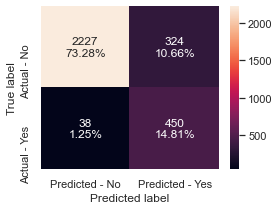

In [88]:
# Calculating different metrics
get_metrics_score(xgb_tunedGS,X_train_over,X_test,y_train_over,y_test)

# Creating confusion matrix
make_confusion_matrix(xgb_tunedGS, y_test)

- Tuned Model seems to perform very well and have a high recall score for both train and test data set.

### Randomized Search CV XGBoost

In [89]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(10,100,20),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
           'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}





# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 0.8, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__reg_lambda': 10, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__max_depth': 5, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__gamma': 5} with CV score=0.9499613571373366:
Wall time: 1min


In [90]:
# Creating new pipeline with best parameters
xgb_tunedRS = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=50,
                scale_pos_weight=10,
                gamma=5,
                subsample=0.8,
                learning_rate= 0.01,
                eval_metric='logloss', max_depth = 5, reg_lambda = 1
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tunedRS.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=5,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9085560598419903
Accuracy on test set :  0.859822309970385
Recall on training set :  0.9598251807026391
Recall on test set :  0.9364754098360656
Precision on training set :  0.8705595365147126
Precision on test set :  0.5363849765258216
F1 on training set :  0.9130156699712185
F1 on test set :  0.682089552238806


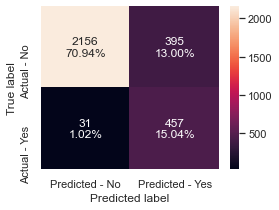

In [91]:
# Calculating different metrics
get_metrics_score(xgb_tunedRS,X_train_over,X_test,y_train_over,y_test)

# Creating confusion matrix
make_confusion_matrix(xgb_tunedRS, y_test)

- Randomized Search using same XGboost returns a slightly better recall than Grid Search.

#### Grid Search on Bagging Classifier

In [92]:
#checking shape to see the number of features
X_train.shape

(7088, 24)

In [93]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

#Parameter grid to pass in GridSearchCV
param_grid={'baggingclassifier__n_estimators':np.arange(50,200,50),'baggingclassifier__max_features':[10,15,18,20,22],
            'baggingclassifier__max_samples':[800,1000,1200]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'baggingclassifier__max_features': 22, 'baggingclassifier__max_samples': 1200, 'baggingclassifier__n_estimators': 150} with CV score=0.7190586598655229:
Wall time: 1min 51s


In [94]:
# Creating new pipeline with best parameters and creating tuned bagging classifier
bg_tunedGS = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        random_state=1,
        n_estimators=150,
        max_features=22,
        max_samples=1200,
    ),
)

# Fit the model on training data
bg_tunedGS.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(max_features=22, max_samples=1200,
                                   n_estimators=150, random_state=1))])

Accuracy on training set :  0.8775424441082534
Accuracy on test set :  0.941428101349128
Recall on training set :  0.7648344259539418
Recall on test set :  0.7069672131147541
Precision on training set :  0.9874131944444444
Precision on test set :  0.9078947368421053
F1 on training set :  0.8619873070000947
F1 on test set :  0.794930875576037


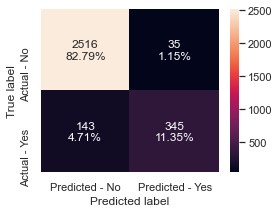

In [95]:
# Calculating different metrics
get_metrics_score(bg_tunedGS,X_train_over,X_test,y_train_over,y_test)

# Creating confusion matrix
make_confusion_matrix(bg_tunedGS, y_test)

- The tuned Bagging Classifier is not able to significantly better than the original model. However we do see the F1 score has improved a bit. 
- Our metric still remains Recall. Will use random search to see performance improves.

#### Random Search using Bagging

In [96]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),BaggingClassifier(random_state=1, n_estimators = 50))

#Parameter grid to pass in GridSearchCV
param_grid={'baggingclassifier__n_estimators':np.arange(50,200,50),'baggingclassifier__max_features':[10,15,18,20,22],
            'baggingclassifier__max_samples':[800,1000,1200]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'baggingclassifier__n_estimators': 150, 'baggingclassifier__max_samples': 1200, 'baggingclassifier__max_features': 22} with CV score=0.7190586598655229:
Wall time: 1min 55s


In [97]:
# Creating new pipeline with best parameters and creating tuned bagging classifier
bg_tunedRS = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        random_state=1,
        n_estimators=150,
        max_features=22,
        max_samples=1200,
    ),
)

# Fit the model on training data
bg_tunedRS.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(max_features=22, max_samples=1200,
                                   n_estimators=150, random_state=1))])

Accuracy on training set :  0.8775424441082534
Accuracy on test set :  0.941428101349128
Recall on training set :  0.7648344259539418
Recall on test set :  0.7069672131147541
Precision on training set :  0.9874131944444444
Precision on test set :  0.9078947368421053
F1 on training set :  0.8619873070000947
F1 on test set :  0.794930875576037


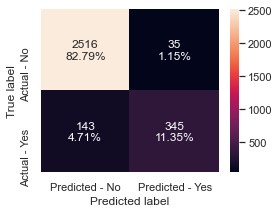

In [98]:
# Calculating different metrics
get_metrics_score(bg_tunedRS,X_train_over,X_test,y_train_over,y_test)

# Creating confusion matrix
make_confusion_matrix(bg_tunedRS, y_test)

- Randomized Search too results in same performance as Grid Search

#### Grid Search on Decision Tree

In [99]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

#Parameter grid to pass in GridSearchCV
param_grid={'decisiontreeclassifier__max_depth':np.arange(1,10),'decisiontreeclassifier__criterion':['entropy','gini'],
            'decisiontreeclassifier__splitter':['best','random'],
            'decisiontreeclassifier__min_impurity_decrease': [0.000001,0.00001],
           }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 9, 'decisiontreeclassifier__min_impurity_decrease': 1e-06, 'decisiontreeclassifier__splitter': 'best'} with CV score=0.7523997217713888:
Wall time: 8.21 s


In [100]:
# Creating new pipeline with best parameters and creating tuned bagging classifier
dt_tunedGS = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(
        max_depth=9,
        criterion='entropy',
        splitter='best',
        min_impurity_decrease=0.000001
    ),
)

# Fit the model on training data
dt_tunedGS.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=9,
                                        min_impurity_decrease=1e-06))])

Accuracy on training set :  0.9199865523617414
Accuracy on test set :  0.930898321816387
Recall on training set :  0.8522440746343923
Recall on test set :  0.7684426229508197
Precision on training set :  0.9858059498347268
Precision on test set :  0.7944915254237288
F1 on training set :  0.9141723764875586
F1 on test set :  0.7812499999999999


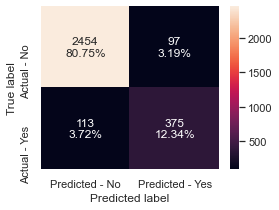

In [101]:
# Calculating different metrics
get_metrics_score(dt_tunedGS,X_train_over,X_test,y_train_over,y_test)

# Creating confusion matrix
make_confusion_matrix(dt_tunedGS, y_test)

- We do see slight improvement on Recall score as compared to the original Deicision Tree Model.

#### Randomized Search for Decision Tree

In [102]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),DecisionTreeClassifier(random_state=1))

#Parameter grid to pass in GridSearchCV
param_grid={'decisiontreeclassifier__max_depth':np.arange(1,10),'decisiontreeclassifier__criterion':['entropy','gini'],
            'decisiontreeclassifier__splitter':['best','random'],
            'decisiontreeclassifier__min_impurity_decrease': [0.000001,0.00001],
           }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'decisiontreeclassifier__splitter': 'best', 'decisiontreeclassifier__min_impurity_decrease': 1e-05, 'decisiontreeclassifier__max_depth': 9, 'decisiontreeclassifier__criterion': 'entropy'} with CV score=0.7523997217713888:
Wall time: 5.33 s


In [103]:
# Creating new pipeline with best parameters and creating tuned bagging classifier
dt_tunedRS = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(
        max_depth=9,
        criterion='entropy',
        splitter='best',
        min_impurity_decrease=0.00001
    ),
)

# Fit the model on training data
dt_tunedRS.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=9,
                                        min_impurity_decrease=1e-05))])

Accuracy on training set :  0.9209110774920155
Accuracy on test set :  0.933201711089174
Recall on training set :  0.8544293158514036
Recall on test set :  0.7766393442622951
Precision on training set :  0.985459480418767
Precision on test set :  0.8012684989429175
F1 on training set :  0.9152786531016476
F1 on test set :  0.7887617065556712


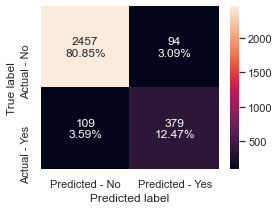

In [104]:
# Calculating different metrics
get_metrics_score(dt_tunedRS,X_train_over,X_test,y_train_over,y_test)

# Creating confusion matrix
make_confusion_matrix(dt_tunedRS, y_test)

- Random Search provides slightly better Recall Score.

In [105]:
# defining list of model
models = [lr,log_reg_over,lr_estimator,log_reg_under,xgb_tunedGS,xgb_tunedRS,bg_tunedGS,bg_tunedRS,dt_tunedGS,dt_tunedRS]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [106]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression on Oversampled data',
                                          'Logistic Regression-Regularized','Logistic Regression on Undersampled data',
                                         'XGBoost Grid Search','XGBoost Random Search','Bagging Classifier Grid Search',
                                         'Bagging Classifier Random Search','Decision Tree Grid Search','Decision Tree Random Search'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                         'Train_F1':f1_train,'Test_F1':f1_test
                                }) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
5                     XGBoost Random Search        0.875282       0.859822   
4                       XGBoost Grid Search        0.896021       0.880882   
9               Decision Tree Random Search        0.974464       0.933202   
8                 Decision Tree Grid Search        0.974464       0.930898   
3  Logistic Regression on Undersampled data        0.757195       0.758144   
6            Bagging Classifier Grid Search        0.961061       0.941428   
7          Bagging Classifier Random Search        0.961061       0.941428   
1   Logistic Regression on Oversampled data        0.781179       0.781507   
2           Logistic Regression-Regularized        0.795852       0.785785   
0                       Logistic Regression        0.879797       0.871997   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_F1  \
5      0.969271     0.936475         0.565284        0.536385  0.714101   
4      0.971905     0.922131         0.610927        0.581395  0.750254   
9      0.906936     0.776639         0.932310        0.801268  0.919448   
8      0.905180     0.768443         0.933877        0.794492  0.919305   
3      0.743635     0.709016         0.372144        0.368477  0.496047   
6      0.808604     0.706967         0.940756        0.907895  0.869688   
7      0.808604     0.706967         0.940756        0.907895  0.869688   
1      0.669008     0.639344         0.393595        0.390000  0.495610   
2      0.549605     0.508197         0.401282        0.376328  0.463876   
0      0.366111     0.331967         0.762340        0.720000  0.494662   

    Test_F1  
5  0.682090  
4  0.713154  
9  0.788762  
8  0.781250  
3  0.484933  
6  0.794931  
7  0.794931  
1  0.484472  
2  0.432432  
0  0.454418

- Based on the above results, XGBoost with Random Search has yielded the best model for us when keeping Recall as our metric to improve. With XG Boost we were able to get a very high recall of 93% at the same time there is no overfitting.
- Grid Search CV is significantly more time consuming that using Random Search CV. As dicussed during the recorded tutorials and in mentored learning session, Random Search can be used when we quickly want to understand how various model will perform.

#### Getting the most important features for best model i.e. XGBoost Tuned using Random Search

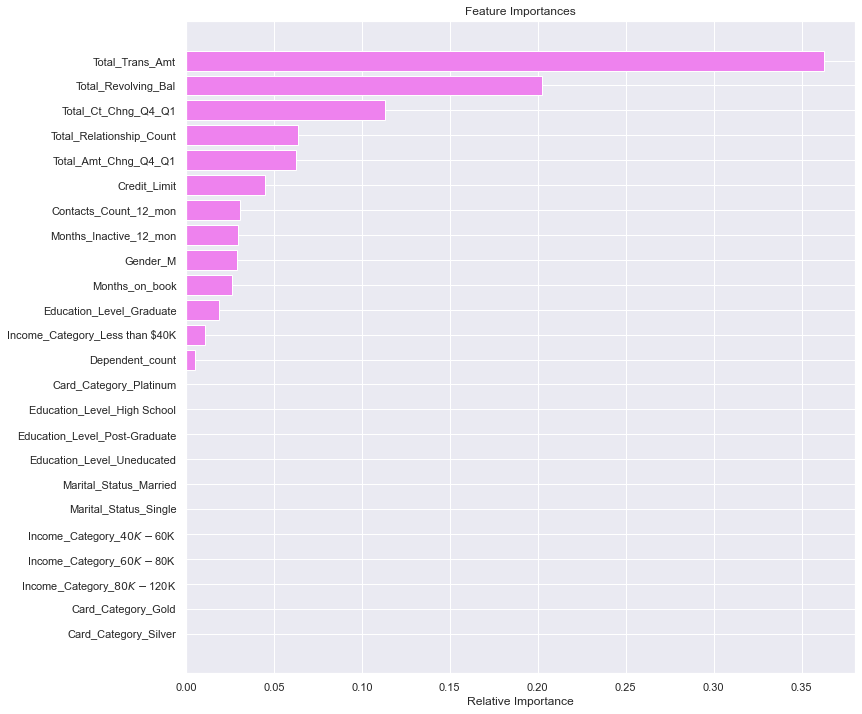

In [107]:
feature_names = X_train.columns
importances = xgb_tunedRS[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Business Insights
- From the data it looks like quite a few customers remain inactive for 1-3 months. Bank should look into ways to keep the customer active there by reducing the chances of customer to Attrite.
- Relationship count is another factors that can affect customers. Having more relationships is more likely to keep the customer from leaving the bank. Bank could make efforts to increase the number of relationship accounts customer has.
- Customers with less revolving balance also seem to attrite more than others. Efforts could be made by offering deals to such customers.
- Total Trans Amt seems to be the most important feature followed by Revolving Bal and Total Ct Change Q4 Q1.
- Based on the model trained, we can make predictions for customers who are very likely to attrite. Bank can use this  information to make better offers to customer and retain the customers.